To use the functional connectivity (fc) package, import it from thalpy as shown below. The class you will be using is FcData, I imported the class directly here to make using it easier.
Upon initialization, the FcData class requires: the path to the base path dataset you are using, n_masker (masker for n regions), m_masker (masker for m regions), output file (the name of the file to output).
The resulting functional connectivity matrix will be of shape n x m.

An example is shown below. You will likely need the masks package from thalpy so import that too. I create my n_masker and m_masker using the morel mask (n = 2227) and schaeffer mask (m = 400) so the resulting fc matrix for all subjects will be 2227 x 400.
The FcData class is initialized by passing all the required arguments listed above. There are also numerous optional arguments that should be shown in the documentation. One that I used here is the bold_WC argument, which is used to pattern match for the bold files that will be passed to the fc function. I only wanted the files from 

In [19]:
from thalpy.fc import FcData, plot_correlations
from thalpy import masks

n_masker = masks.binary_masker(masks.MOREL_PATH)
m_masker = masks.roi_masker(masks.SCHAEFER_400_7N_PATH)
fc = FcData("/data/backed_up/shared/test_dataset", n_masker, m_masker, "fc_morel_schaeffer.p", bold_WC="*run-1*preproc_bold.nii.gz")

Now that you have your object initialized, you can calculate fc! Run the calc_fc function, optionally passing the number of cores (by default it runs 8). This will take a lil bit so be patient.

In [25]:
fc.calc_fc(cores=2)
print("DONE!")

Calculating functional connectivity for each subject in parallel with 2 processes.
Running FC on subject: 10001
*run-1*preproc_bold.nii.gz
['/data/backed_up/shared/test_dataset/fmriprep/sub-10001/func/sub-10001_task-ThalHi_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']
Running FC on subject: 10002
*run-1*preproc_bold.nii.gz
['/data/backed_up/shared/test_dataset/fmriprep/sub-10002/func/sub-10002_task-ThalHi_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']


/opt/anaconda3-2020.07/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/mnt/nfs/lss/lss_kahwang_hpc/scripts/thalpy/analysis/denoise.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[np.isnan(df[col]), col] = np.mean(df[col])
/opt/anaconda3-2020.07/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

saving
DONE!


 Now that you have the fc_data. You can iterate through subjects to look at the data, the correlations are stored in the seed_to_voxel_correlations field. 
 Or you can use the data field in the FcData class to pull out all the correlations into a matrix. 

 For plotting you can use the plot_correlations function from the fc package to plot indiviudal fc matrices. Or you can use the FcData plot function to plot all subjects at once.

(2227, 400)


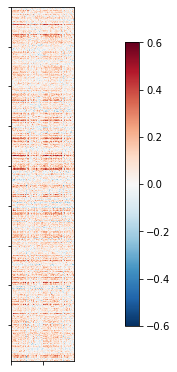

(2227, 400)


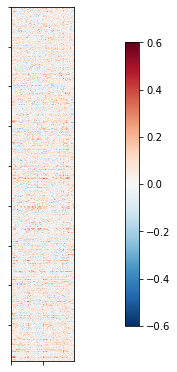

(2227, 400, 2)
[[[-0.06379241  0.22417358]
  [-0.04402654  0.09435721]
  [ 0.04386004  0.21463583]
  ...
  [ 0.0834024   0.00990948]
  [ 0.1521909   0.        ]
  [ 0.13060343  0.03906892]]

 [[ 0.10671601  0.14416471]
  [ 0.08263214  0.03633966]
  [ 0.20048818  0.17637125]
  ...
  [ 0.05104421  0.00346305]
  [ 0.13678667  0.05156607]
  [ 0.13506933 -0.07760856]]

 [[-0.14025797 -0.1396435 ]
  [-0.06901203 -0.10577777]
  [ 0.04859821 -0.0614542 ]
  ...
  [-0.14185515 -0.15034014]
  [ 0.         -0.1889215 ]
  [ 0.08392336 -0.13876934]]

 ...

 [[ 0.14565702  0.03244001]
  [ 0.08469194 -0.08594178]
  [ 0.02413211  0.04071353]
  ...
  [ 0.07161562  0.02139961]
  [ 0.03271249  0.05031281]
  [-0.05503268  0.05624644]]

 [[ 0.01988556  0.10776185]
  [ 0.13528024 -0.07008056]
  [-0.01432077  0.17263046]
  ...
  [ 0.05811417  0.        ]
  [ 0.00542412  0.0098136 ]
  [-0.06070158  0.06547935]]

 [[ 0.08199214  0.05308159]
  [ 0.05468505  0.05185506]
  [ 0.05535692  0.13898218]
  ...
  [-0.003

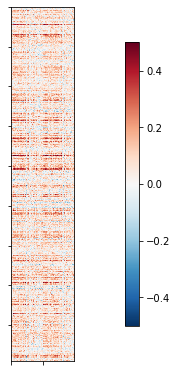

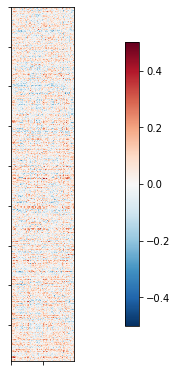

In [29]:
for sub in fc.fc_subjects:
    print(sub.seed_to_voxel_correlations.shape)
    plot_correlations(sub.seed_to_voxel_correlations, vmax=0.6, vmin=-0.6)
    
print(fc.data.shape)
print(fc.data)
fc.plot()